## 0. Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix, classification_report

In [3]:
from sklearn.model_selection import GridSearchCV

## 1. Import and warehouse data:

In [4]:
df1 = pd.read_csv('Part2 - Data1.csv')  #read the csv file
df2 = pd.read_csv('Part2 -Data2.csv')  #read the csv file
print("The Size of df1 is :",df1.size,"and the Shape is :",df1.shape) #get size and shape of the dataset
print("The Size of df2 is :",df2.size,"and the Shape is :",df2.shape) #get size and shape of the dataset

The Size of df1 is : 40000 and the Shape is : (5000, 8)
The Size of df2 is : 35000 and the Shape is : (5000, 7)


In [5]:
df1.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [6]:
df2.tail(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0
4999,5000,0,0,0,1,1,0.0


In [7]:
df = pd.merge(df1, df2, on="ID")
row, column = df.shape
print('The final Dataset contains',row,"rows and",column,"columns")
print('The size of the final dataset is :',df.size)

The final Dataset contains 5000 rows and 14 columns
The size of the final dataset is : 70000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                     5000 non-null int64
Age                    5000 non-null int64
CustomerSince          5000 non-null int64
HighestSpend           5000 non-null int64
ZipCode                5000 non-null int64
HiddenScore            5000 non-null int64
MonthlyAverageSpend    5000 non-null float64
Level                  5000 non-null int64
Mortgage               5000 non-null int64
Security               5000 non-null int64
FixedDepositAccount    5000 non-null int64
InternetBanking        5000 non-null int64
CreditCard             5000 non-null int64
LoanOnCard             4980 non-null float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


## 2. Data cleaning:

In [9]:
print('Null values:\n',df.isnull().sum()) #finds the null values in the dataset

Null values:
 ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64


In [10]:
for column in df.columns: #Replacing null values in the "LoanOnCard" column with most accuring values(mode)
    df[column].fillna(df[column].mode()[0], inplace=True)


In [11]:
df['LoanOnCard'] = df['LoanOnCard'].astype(int) #changing datatype from float to int

## 3. Data analysis & visualisation:

In [12]:
df.describe().transpose() #Generate descriptive statistics that summarize the central tendency and transposing it

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


#### Inference:
* There is a junk value in the **CustomerSince** column since there is a minimum value of '-3' which is an incorrect information.
* The **ID** and **ZipCode** columns dosen't add any value to the analysis of the data.

In [13]:
negCustomer=df[df['CustomerSince']<0]

In [14]:
negCustomer['CustomerSince'].value_counts()

-1    33
-2    15
-3     4
Name: CustomerSince, dtype: int64

In [15]:
negvalues=[-3, -2, -1] # Replacing negative CustomerSince values with the median value in the CustomerSince column

for i in negvalues:
    df['CustomerSince']=df['CustomerSince'].replace(negvalues,np.median(df['CustomerSince']))

In [16]:
df['CustomerSince'].describe() #checking the minimun vale after replacing negative values

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: CustomerSince, dtype: float64

In [17]:
df.drop(['ID','ZipCode'],axis=1,inplace=True) #Dropping the columns which dosen't add value

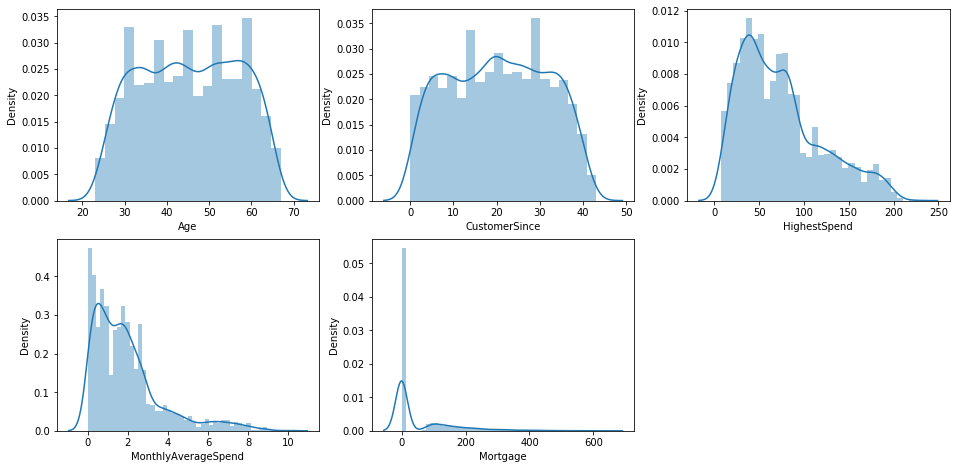

In [18]:
col=['Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend','Mortgage']

i=3
j=0
plt.figure(figsize=(16,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(df[k])
    j=j+1
plt.show()

#### Inference: 
* From the plots above it can be observed that **Age** and **CustomerSince** are distributed evenly accross mean and hence Noramlly distibuted.
 - majority of customers fall between the age of 30 and 60 years of age.
* **HighestSpend**, **MonthlyaverageSpend** and **Mortgage** are positively skewed that and median is lesser than the mean.
 - Majority of customers have Highest spending between 45k and 55k.
 - Majority of customers spend less than 2.5k on average each month.
 - majority (almost 70%) have mortgage less than 30K and maximum is 650k.

 

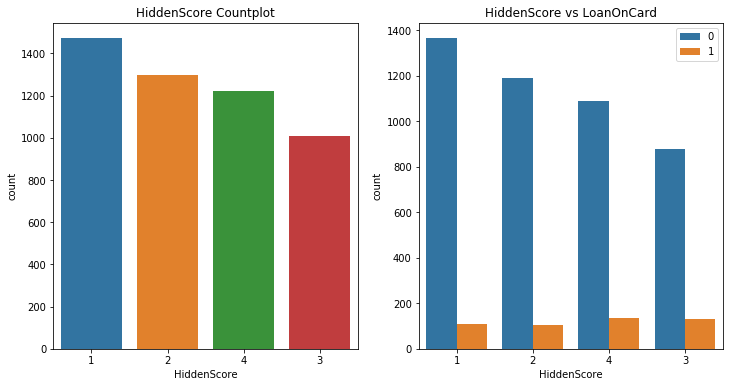

In [19]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['HiddenScore'],hue=df['LoanOnCard'],ax=axes[1],order = df["HiddenScore"].value_counts().index)
plt.legend()
ax.set_title('HiddenScore vs LoanOnCard')
ax = sns.countplot(df['HiddenScore'],ax=axes[0],order = df["HiddenScore"].value_counts().index)
plt.legend()
ax.set_title('HiddenScore Countplot')
plt.show()

#### Inference:
* Majority have hiddenscore of 1
* More the hidden score more the loan acceptance.
 - for hiddenscore of 4 the load acceptance is also more.

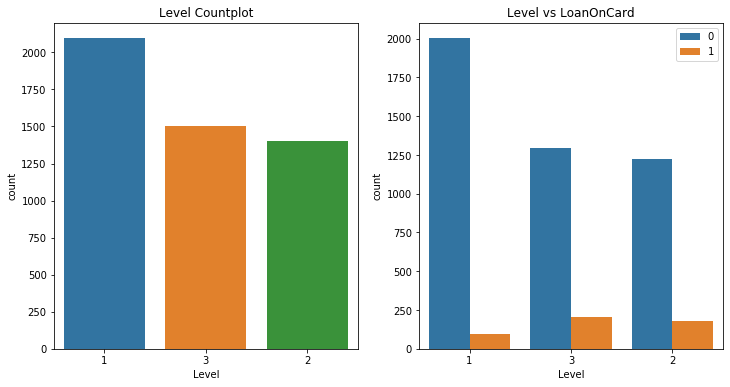

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Level'],hue=df['LoanOnCard'],ax=axes[1],order = df["Level"].value_counts().index)
plt.legend()
ax.set_title('Level vs LoanOnCard')
ax = sns.countplot(df['Level'],ax=axes[0],order = df["Level"].value_counts().index)
plt.legend()
ax.set_title('Level Countplot')
plt.show()

#### Inference:
* more the level more is the acceptance of loan or loan taken.


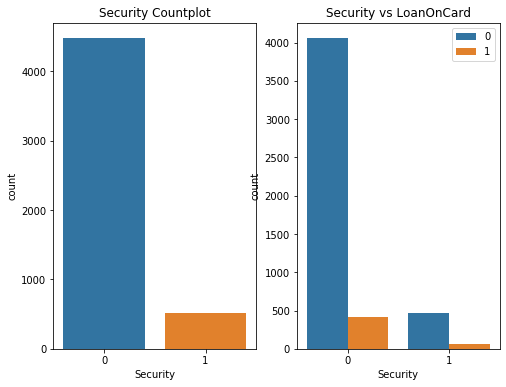

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(8,6) )
ax = sns.countplot(df['Security'],hue=df['LoanOnCard'],ax=axes[1],order = df["Security"].value_counts().index)
plt.legend()
ax.set_title('Security vs LoanOnCard')
ax = sns.countplot(df['Security'],ax=axes[0],order = df["Security"].value_counts().index)
plt.legend()
ax.set_title('Security Countplot')
plt.show()

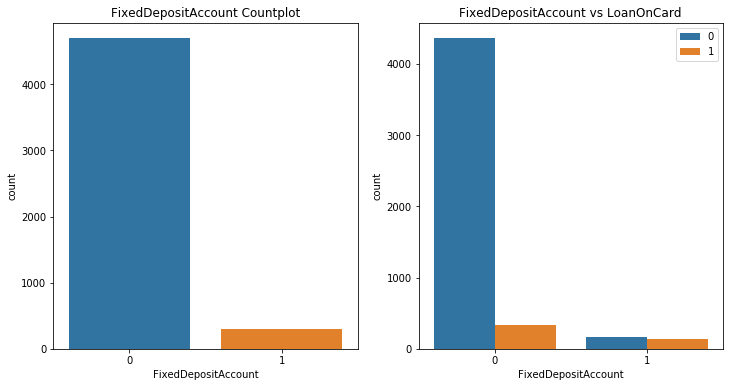

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['FixedDepositAccount'],hue=df['LoanOnCard'],ax=axes[1],order = df["FixedDepositAccount"].value_counts().index)
plt.legend()
ax.set_title('FixedDepositAccount vs LoanOnCard')
ax = sns.countplot(df['FixedDepositAccount'],ax=axes[0],order = df["FixedDepositAccount"].value_counts().index)
plt.legend()
ax.set_title('FixedDepositAccount Countplot')
plt.show()

#### Inference:
* Almost all the customers who have fixed deposit accounts went for Loans.

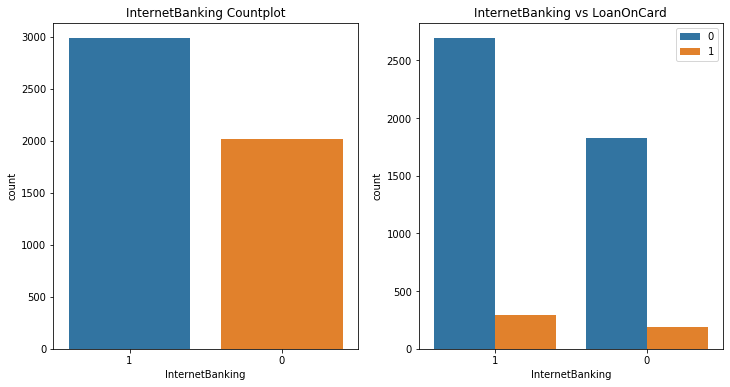

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['InternetBanking'],hue=df['LoanOnCard'],ax=axes[1],order = df["InternetBanking"].value_counts().index)
plt.legend()
ax.set_title('InternetBanking vs LoanOnCard')
ax = sns.countplot(df['InternetBanking'],ax=axes[0],order = df["InternetBanking"].value_counts().index)
plt.legend()
ax.set_title('InternetBanking Countplot')
plt.show()

#### Inference:
* Most of the customers have Internet banking.

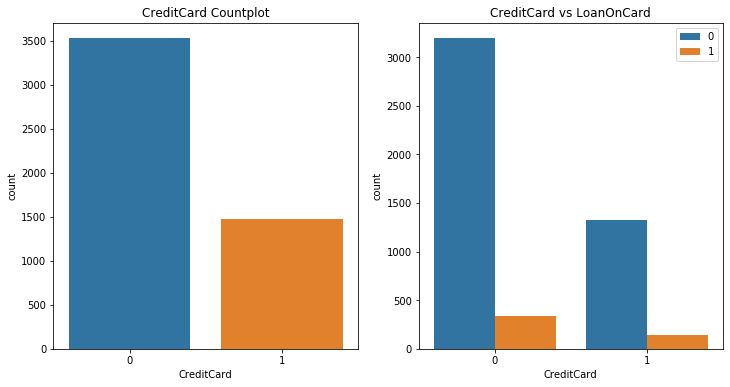

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['CreditCard'],hue=df['LoanOnCard'],ax=axes[1],order = df["CreditCard"].value_counts().index)
plt.legend()
ax.set_title('CreditCard vs LoanOnCard')
ax = sns.countplot(df['CreditCard'],ax=axes[0],order = df["CreditCard"].value_counts().index)
plt.legend()
ax.set_title('CreditCard Countplot')
plt.show()

#### Inference:
* Only a few customers opted for a Credit card.

In [25]:
corr = df.corr() #Finds corelation between the features

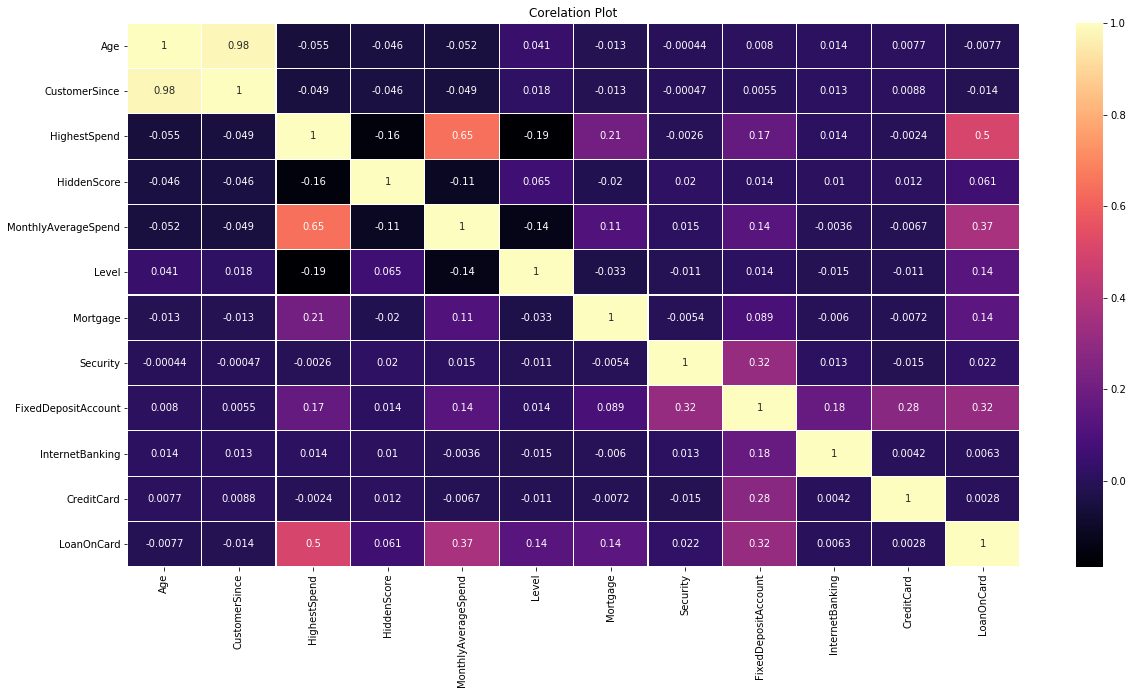

In [26]:
fig,ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(df.corr(),annot=True,linewidths=0.01,fmt='.2g',cmap="magma")  #Plot rectangular heatmap as a color-encoded matrix
bottom,top = ax.get_ylim()
plt.title("Corelation Plot")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Inference:
* CustomerSince and Age are highly positively corelated with eachother and hence one feature can be removed to avoid multi-colinearity issue.

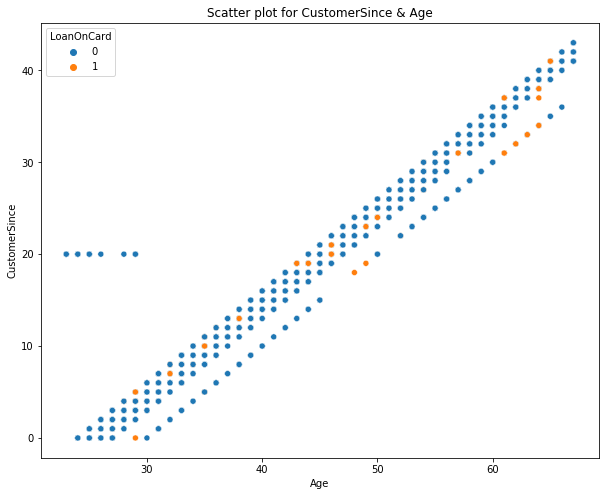

In [27]:
plt.figure(figsize=(10,8))
plt.title("Scatter plot for CustomerSince & Age")
sns.scatterplot(x='Age',y='CustomerSince', hue='LoanOnCard', data=df)
plt.show()

Since age and CustomerSince are highly positively corelated, Dropping CustomerSince dosen't affect the analysis.

In [28]:
df = df.drop(['CustomerSince'],axis = 1)

## 4. Data pre-processing:

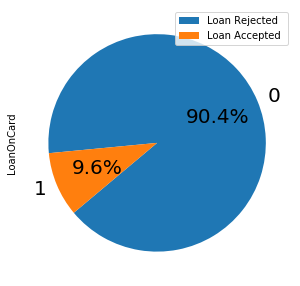

In [29]:
fig,ax = plt.subplots( figsize=(5,5) )
df['LoanOnCard'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=220)
plt.legend(['Loan Rejected','Loan Accepted '])
plt.show()

#### Inference:
* The given dataset is baised as Target variable is not equally distributed, only 9.6% of customers have availed Personal Loan so data balancing is a must to make the model learn and predict without being biased and treat both classes equally for better results.

In [30]:
X=df.drop(['LoanOnCard'],axis=1)
y=df['LoanOnCard']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

## 5. Model training, testing and tuning:

## A. Logistic regression

In [32]:
LR1_raw=LogisticRegression(solver='liblinear')
LR1_raw.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
LR1_raw.score(X_train,y_train)

0.9508571428571428

Train Accuracy of the data is 95%

In [34]:
LR1_raw.score(X_test,y_test)

0.9433333333333334

Test accuracy of the dataset is 94.3%

In [35]:
LR1_raw_prediction=LR1_raw.predict(X_test)

In [36]:
cm_LR1=confusion_matrix(y_test,LR1_raw_prediction,labels=[0,1])
print(cm_LR1)
acc_score_LR1=accuracy_score(y_test,LR1_raw_prediction)
f1_score_LR1=f1_score(y_test,LR1_raw_prediction)
print("Accuracy Score  for Logistic Regression RAW DATA:{}".format(acc_score_LR1*100))
print("F1 Score  for Logistic Regression RAW DATA:{}".format(f1_score_LR1*100))
print(classification_report(y_test,LR1_raw_prediction))

[[1326   17]
 [  68   89]]
Accuracy Score  for Logistic Regression RAW DATA:94.33333333333334
F1 Score  for Logistic Regression RAW DATA:67.68060836501901
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.84      0.57      0.68       157

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



#### Inference:
* Despite a good Accuracy score of 95%, this model is not the best model because the data is highly imbalanced.
* On raw data **Recall** is only 57%, which means among the total number of customers who bought the loan, our model predicted only 57% who bought the loan.
* **Precision** is 84% that is of the customers who were predicted to get a loan only 84% actually bought the loan, this score can also be improved. 

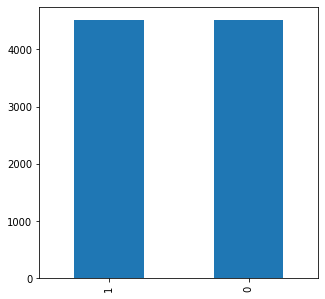

In [37]:
from  sklearn.utils import resample   #Resample arrays or sparse matrices in a consistent way
df_majority=df[df['LoanOnCard']==0]
df_minority=df[df['LoanOnCard']==1]
df_upsample_minority=resample(df_minority,replace=True,random_state=12,n_samples=4520)
df_upsample=pd.concat([df_majority,df_upsample_minority])
count=df_upsample['LoanOnCard'].value_counts()
count.plot(kind='bar',figsize=(5,5));

In [38]:
X_upsampled=df_upsample.drop(['LoanOnCard'],axis=1) #Splitting data into dependables and independent variables after upsampling
Y_upsampled=df_upsample['LoanOnCard']

In [39]:
# Train- test split after upsampling with 70:30 ratio
X_upsampled_test,X_upsampled_train,Y_upsampled_test,Y_upsampled_train=train_test_split(X_upsampled,Y_upsampled,random_state=1,test_size=0.3)

In [40]:
LR1_raw.fit(X_upsampled_train,Y_upsampled_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Pred_Upsample_Log=LR1_raw.predict(X_upsampled_test)
cm_LR1_upsample=confusion_matrix(Y_upsampled_test,Pred_Upsample_Log,labels=[0,1])

In [42]:
acc_score_log1=accuracy_score(y_test,LR1_raw_prediction)
f1_score_log1=f1_score(y_test,LR1_raw_prediction)
print("Accuracy Score  for Logistic Regression with RAW DATA:{}".format(acc_score_log1*100))
print("F1 Score  for Logistic Regression with RAW DATA:{}".format(f1_score_log1*100))
print("******THE CONFUSION MATRIX LOGISTIC REGRESSION  WITH RAW DATA*****")
print("Confusion Matrix: \n",cm_LR1)
print("******CLASSIFICATION REPORT LOGISTIC REGRESSION WITH RAW DATA******")
print(classification_report(y_test,LR1_raw_prediction))
acc_score_upsampled=accuracy_score(Y_upsampled_test,Pred_Upsample_Log)
f1_score_upsampled=f1_score(Y_upsampled_test,Pred_Upsample_Log)
print("Accuracy Score  for Logistic Regression Upsampled Data:{}".format(acc_score_upsampled*100))
print("F1 Score  for Logistic Regression:{}".format(f1_score_upsampled*100))
print("******THE CONFUSION MATRIX LOGISTIC REGRESSION WITH Upsampled DATA******")
print("Confusion Matrix: \n",cm_LR1_upsample)
print("******CLASSIFICATION REPORT LOGISTIC REGRESSION WITH Upsampled DATA******")
print(classification_report(Y_upsampled_test,Pred_Upsample_Log))

Accuracy Score  for Logistic Regression with RAW DATA:94.33333333333334
F1 Score  for Logistic Regression with RAW DATA:67.68060836501901
******THE CONFUSION MATRIX LOGISTIC REGRESSION  WITH RAW DATA*****
Confusion Matrix: 
 [[1326   17]
 [  68   89]]
******CLASSIFICATION REPORT LOGISTIC REGRESSION WITH RAW DATA******
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.84      0.57      0.68       157

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500

Accuracy Score  for Logistic Regression Upsampled Data:90.83438685208597
F1 Score  for Logistic Regression:91.0410874266296
******THE CONFUSION MATRIX LOGISTIC REGRESSION WITH Upsampled DATA******
Confusion Matrix: 
 [[2801  357]
 [ 223 2947]]
******CLASSIFICATION REPORT LOGISTIC REGRESSION WITH Upsampled DATA******
              precision    recall  

#### Inference:
* The upsampled data produces an **Accuracy** of 90.8%, with 93% **Recall** and 89% **Precision**. Whereas, model with raw data had a recall of 57% and Precision of 84%.
* **THE BEST MODEL IS THE ONE WITH UPSAMPLED DATASET**
 - Recall of 93% means, among the customers who bought the loan the model predicted 93% to be right.
 - Among the total customers the model predicted 89% of the customers who actually took the loan
 - In the Logistic model with Upsampled data, 357 customers were (False postive) predicted to take the loan but they did not
 - 223 were predicted not have taken the loan but they did take the loan(Type2 error dosen't have any negative impact)

## B. Naive Bayes

In [54]:
nbR = GaussianNB()
nbR.fit(X_train,y_train)
nbR_predict = nb.predict(X_test)
nbR_accu_test = nb.score(X_test,y_test)
nbR_accu_train = nb.score(X_train,y_train)
nbR_f1 = f1_score(y_test,nbR_predict)
print("Training Accuracy :", nbR_accu_train)
print("Testing accuracy  :",nbR_accu_test)
print("F1 Score :",nbR_f1)
print("Naive Bayes Confusion matrix :\n\n", confusion_matrix(y_test,nbR_predict))
print("***********CLASSIFICATION REPORT NAIVE BAYES WITH RAW DATA***********")
print(classification_report(y_test,nbR_predict))

Training Accuracy : 0.8714285714285714
Testing accuracy  : 0.8786666666666667
F1 Score : 0.5787037037037037
Naive Bayes Confusion matrix :

 [[1193  150]
 [  32  125]]
***********CLASSIFICATION REPORT NAIVE BAYES WITH RAW DATA***********
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1343
           1       0.45      0.80      0.58       157

    accuracy                           0.88      1500
   macro avg       0.71      0.84      0.75      1500
weighted avg       0.92      0.88      0.89      1500



#### Inference:
* Since the data is imbalanced the **recall** is observed to be high at 80%.
* Among the total customers the model predicted only 45% of the customers who actually took the loan

In [53]:
nb = GaussianNB()
nb.fit(X_upsampled_train,Y_upsampled_train)
nb_predict = nb.predict(X_upsampled_test)
nb_accu_test = nb.score(X_upsampled_test,Y_upsampled_test)
nb_accu_train = nb.score(X_upsampled_train,Y_upsampled_train)
nb_f1 = f1_score(Y_upsampled_test,nb_predict)
print("Training Accuracy :", nb_accu_train)
print("Testing accuracy  :",nb_accu_test)
print("F1 Score :",nb_f1)
print("Naive Bayes Confusion matrix :\n\n", confusion_matrix(Y_upsampled_test,nb_predict))
print("***********CLASSIFICATION REPORT NAIVE BAYES WITH UPSAMPLED DATA***********")
print(classification_report(Y_upsampled_test,nb_predict))

Training Accuracy : 0.8337020648967551
Testing accuracy  : 0.831858407079646
F1 Score : 0.8224299065420559
Naive Bayes Confusion matrix :

 [[2800  358]
 [ 706 2464]]
***********CLASSIFICATION REPORT NAIVE BAYES WITH Upsampled DATA***********
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      3158
           1       0.87      0.78      0.82      3170

    accuracy                           0.83      6328
   macro avg       0.84      0.83      0.83      6328
weighted avg       0.84      0.83      0.83      6328



#### Inference:
* The upsampled data produces an F1 score of 82.24%, with 78% Recall and 87% Precision. Whereas, model with raw data had a recall of 80% and Precision of 45%.

In [55]:
param_grid_nb = {
    'var_smoothing':np.logspace(0,-9,num=100)
}    

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.

In [57]:
nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nb_grid.fit(X_upsampled_train,Y_upsampled_train)
print(nb_grid.best_estimator_)
#Fitting 10 folds for each of 100 candidates, totalling 1000 fits

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    1.5s


GaussianNB(priors=None, var_smoothing=6.579332246575683e-06)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.3s finished


In [59]:
nb_grid_predict = nb_grid.predict(X_upsampled_test)
nb_grid_accu_test = nb_grid.score(X_upsampled_test,Y_upsampled_test)
nb_grid_accu_train = nb_grid.score(X_upsampled_train,Y_upsampled_train)
nb_grid_f1 = f1_score(Y_upsampled_test,nb_grid_predict)
acc_score_nb_grid=accuracy_score(Y_upsampled_test,nb_grid_predict)
print("Accuracy Score  for Naive bayes with tuning on Upsampled Data:{}".format(acc_score_nb_grid*100))
print("Training Accuracy :", nb_grid_accu_train)
print("Testing accuracy  :",nb_grid_accu_test)
print("F1 Score :",nb_grid_f1)
print("Naive Bayes TUNING Confusion matrix :\n\n", confusion_matrix(Y_upsampled_test,nb_grid_predict))
print("***********CLASSIFICATION REPORT NAIVE BAYES WITH HYPERPARAMETER TUNING ON UPSAMPLED DATA***********")
print(classification_report(Y_upsampled_test,nb_grid_predict))

Accuracy Score  for Naive bayes with tuning on Upsampled Data:86.18836915297092
Training Accuracy : 0.8565634218289085
Testing accuracy  : 0.8618836915297092
F1 Score : 0.8576083414793092
Naive Bayes TUNING Confusion matrix :

 [[2822  336]
 [ 538 2632]]
***********CLASSIFICATION REPORT NAIVE BAYES WITH HYPERPARAMETER TUNING ON UPSAMPLED DATA***********
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3158
           1       0.89      0.83      0.86      3170

    accuracy                           0.86      6328
   macro avg       0.86      0.86      0.86      6328
weighted avg       0.86      0.86      0.86      6328



#### Inference:
* The Hyperparameter tuned Naive bayes model with upsampled data produces an **Accuracy** of 86.18%, with 83% **Recall** and 89% **Precision**. Whereas, model with raw data had a recall of 80% and Precision of 45%.
* **THE BEST NAIVE BAYES MODEL IS THE ONE WITH UPSAMPLED DATASET AND WITH THE FOLLOWING HYPERPARAMETER TUNING**
 - Recall of 83% means, among the customers who took the loan the model predicted 83% to be right.
 - Among the total customers the model predicted 89% of the customers who actually took the loan
 - In this Naive bayes model with Upsampled data, 336 customers were (False postive) predicted to take the loan but they did not
 - 538 were predicted not have taken the loan but they did take the loan(Type2 error dosen't have any negative impact)

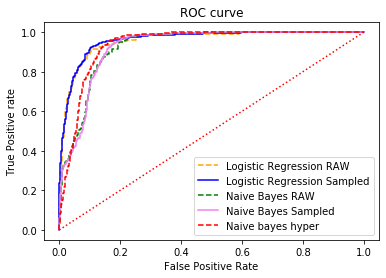

ROC_AUC_Score for Logistic Regression with Raw Data:0.9588050329379514
ROC_AUC_Score for Logistic Regression with Upsample Data:0.9614616526452273
ROC_AUC_Score for Naive Bayes with Raw Data:0.9274463957960836
ROC_AUC_Score for Naive Bayes with Upsample Data:0.9271123559814043
ROC_AUC_Score for Naive Bayes with Hyper parameter tuning and Upsample Data:0.9373628239731651
The Best AUC_SCORE that we have got is :0.9614616526452273


In [65]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

#Perform Predictions for all models both with raw data and upsampled data

PRED_PROB_LOG_RAW=LR1_raw.predict_proba(X_test)
PRED_PROB_LOG_UPSAMPLED=LR1_raw.predict_proba(X_upsampled_test)

PRED_PROB_NB_RAW=nbR.predict_proba(X_test)
PRED_PROB_NB_UPSAMPLED=nb.predict_proba(X_upsampled_test)
PRED_PROB_NB_HYPER=nb_grid.predict_proba(X_upsampled_test)

#calculating fpr,tpr,threshold
fpr1,tpr1,thresh1 = roc_curve(y_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2= roc_curve(Y_upsampled_test,PRED_PROB_LOG_UPSAMPLED[:,1],pos_label=1)
fpr3,tpr3,thresh3=roc_curve(y_test,PRED_PROB_NB_RAW[:,1],pos_label=1)
fpr4,tpr4,thresh4=roc_curve(Y_upsampled_test,PRED_PROB_NB_UPSAMPLED[:,1],pos_label=1)
fpr5,tpr5,thresh5=roc_curve(Y_upsampled_test,PRED_PROB_NB_HYPER[:,1],pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

AUC_LOG_RAW=roc_auc_score(y_test,PRED_PROB_LOG_RAW[:,1])
AUC_LOG_UPSAMPLED=roc_auc_score(Y_upsampled_test,PRED_PROB_LOG_UPSAMPLED[:,1])
AUC_NB_RAW=roc_auc_score(y_test,PRED_PROB_NB_RAW[:,1])
AUC_NB_UPSAMPLED=roc_auc_score(Y_upsampled_test,PRED_PROB_NB_UPSAMPLED[:,1])
AUC_NB_HYPER=roc_auc_score(Y_upsampled_test,PRED_PROB_NB_HYPER[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW,AUC_LOG_UPSAMPLED,AUC_NB_RAW,AUC_NB_UPSAMPLED,AUC_NB_HYPER])

#Plot Area Under Curve

plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression RAW')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='Logistic Regression Sampled')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes RAW')
plt.plot(fpr4,tpr4,linestyle='solid',color='violet', label='Naive Bayes Sampled')
plt.plot(fpr5,tpr5,linestyle='--',color='Red',label='Naive bayes hyper')

plt.plot(p_fpr, p_tpr, linestyle=':', color='red')
plt.title('ROC curve') #title
plt.xlabel('False Positive Rate') # x label
plt.ylabel('True Positive rate')  # y label
plt.legend(loc='best')
plt.show();

print("ROC_AUC_Score for Logistic Regression with Raw Data:{}".format(AUC_LOG_RAW))
print("ROC_AUC_Score for Logistic Regression with Upsample Data:{}".format(AUC_LOG_UPSAMPLED))
print("ROC_AUC_Score for Naive Bayes with Raw Data:{}".format(AUC_NB_RAW))
print("ROC_AUC_Score for Naive Bayes with Upsample Data:{}".format(AUC_NB_UPSAMPLED))
print("ROC_AUC_Score for Naive Bayes with Hyper parameter tuning and Upsample Data:{}".format(AUC_NB_HYPER))  
print("=======================================================================")
print("The Best AUC_SCORE that we have got is :{}".format(AUC_SCORES.max()))

## 6. Conclusion:
* ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
* ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes
 - Higher the AUC, better the model is at distinguishing between a customer taking Loan and Not taking Loan.
* The AUC score for **Logistic Regression Model with Upsampled data** has the highest number, so does the ROC curve.
* The Blue line shows that Logistic model on upsampled data covers more region and 96% can predict classes covering both cutomers who will take and not take the Loan.
* By All means , Accuracy, Precision, Recall , ROC & AUC Logistic regression model on sampled data is the best model for this classification problem followed by **Naive bayes with Hyperparameter tuning**, but Logistic model has the slight edge with better AUC , ROC as it has better class separability.

            +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 

#### Suggestions for future data:
  
* As sensitive data of customers were hidden, No new features were discovered which could have led to better analysis.
* Profession of the customers could be a feature.
* Confusion with the feature **Security** as it can be "**collateral**" (Yes/No) or "**security account**" (Yes/No). 
* A feature **Housing loan**(Yes/No) can be added.
* **Marital status** could be also be added to the list of features.
* Since credit card is a feature, The credit limit of each customer can be observed.
* Number of **Campaign** performed for a particular customer.
* Output of previous marketing compaingn can be recorded
* When to **Contact** a particular customer can be a feature in the future. 